# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

tem algumas maneiras de e fazer isso, poderia fazer novas variáveis flags, porém prefiro criar uma nova coluna de apgar5 com essa categorização

In [3]:
df.loc[df['APGAR5'] <= 3, 'APGAR5_CAT'] = 'asfixia grave'
df.loc[(df['APGAR5'] <= 5) & (df['APGAR5'] > 3),'APGAR5_CAT'] =  'asfixia moderada'
df.loc[(df['APGAR5'] > 5) & (df['APGAR5'] <= 7 ),'APGAR5_CAT'] = 'asfixia leve'
df.loc[df['APGAR5']> 7,'APGAR5_CAT'] = 'normal'

#verificando a quantidade de elementos percebo que há valores vazios nessa troca. 
print(df.APGAR5_CAT.value_counts().sum())
print(df.shape[0])
print(df['APGAR5'].isna().sum())
print(df['APGAR5'].isna().sum() + df.APGAR5_CAT.value_counts().sum())

#apenas por convensao vou alterar os valores vazios dessa nova coluna para 'normal', não vai alterar muito caso precisamos fazer análise

df['APGAR5_CAT'].fillna('normal',inplace=True)


26925
27028
103
27028


In [4]:
df.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_CAT
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

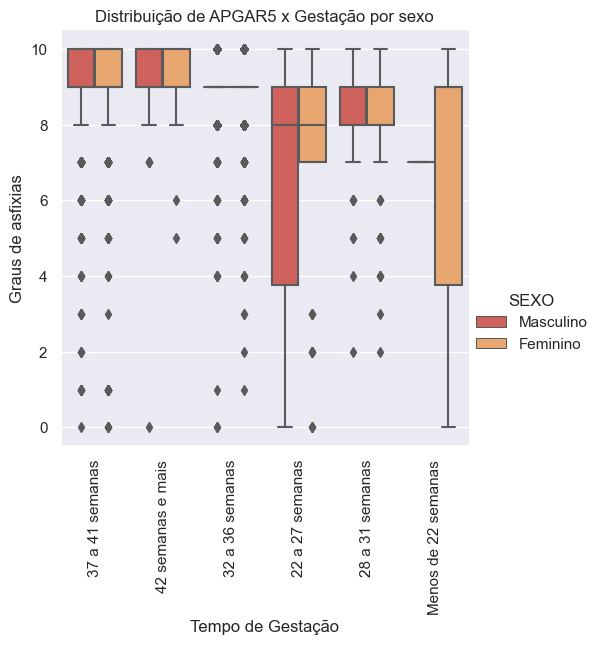

In [5]:
sns.set_theme(style="darkgrid", palette="Spectral")
sns.catplot(data=df,x='GESTACAO',y='APGAR5',hue='SEXO',kind='box')
plt.xticks(rotation=90)
plt.xlabel('Tempo de Gestação')
plt.ylabel('Graus de asfixias')
plt.title('Distribuição de APGAR5 x Gestação por sexo')
plt.show()

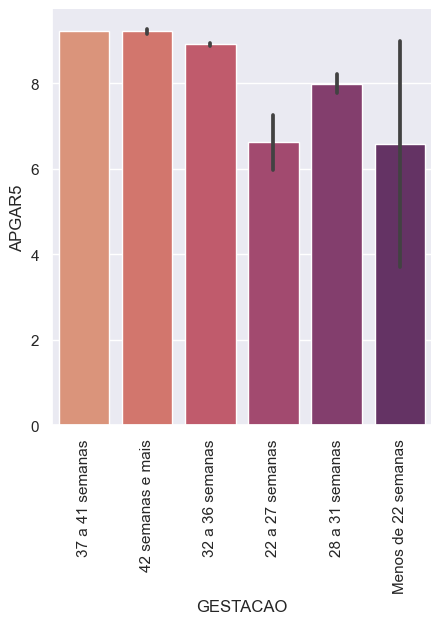

In [6]:
sns.set_theme(style="darkgrid", palette="flare")
sns.catplot(data=df,x='GESTACAO',y='APGAR5',kind='bar')
plt.xticks(rotation=90);plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [11]:
tab = pd.crosstab(df['GESTACAO'],df['APGAR5'])
tab

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [14]:
tab.rename(columns=lambda x : int(x),inplace=True)
tab.sum(axis=1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

In [23]:
pct = tab.div(tab.sum(axis=1),axis=0)
pct

APGAR5,0,1,2,3,4,5,6,7,8,9,10
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

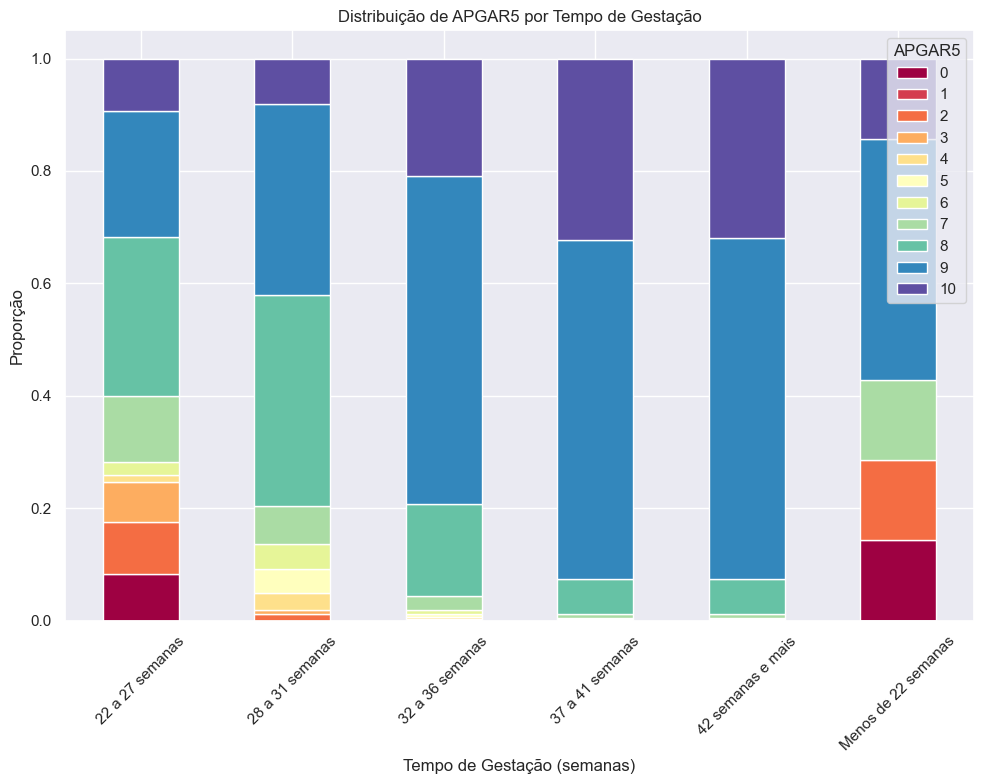

In [36]:
pct.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='Spectral')

plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação (semanas)')
plt.ylabel('Proporção')
plt.legend(title='APGAR5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Bom se avaliarmos cada coluna separadamente acredito que podemos ter alguma conclusão ou alguma hipótese.

- **Menos de 22 semanas** :Nota-se a maior probabilidade de nascer uma com um nível alto de asfixia, é a coluna na qual 40% dos dados têm asfixia sendo metade desses 40% uma asfixia grave pra moderada.

- **22 a 27 semanas** :Continuamos a ver os maiores casos de asfixias graves e moderadas também nessa coluna, um pouco menos que na coluna de menos de 22 semanas, porém é notável que cerca de 20% da base nessa coluna sofre de algum tipo de asfixia que não seja leve ou normal.

- **32 a 36 semanas** :Aqui podemos notar uma melhora no nível de asfixia, o que nos mostra que conforma vai se aproximando das 37 supostas 37 semanas, os bebês vão tendo cada vez menos asfixias graves/moderadas. Nesse caso apenas uma pequena parte vem sofrendo de asfixia que nao seja leve.

- **37 a 41 semanas** :Portando, fica muito claro que nesse grupo de dados, o nível de asfixias que não seja leve leve ou normal, é praticamente "irrelevante", uma vez que nem aparece no nosso gráfico. Fica bem nítido que os médicos estão totalmente corretos, porque conforme as semanas vão se aproximando da semana 37 como já foi dito, os níveis de asfixia vão cada vez mais diminuindo até encontrar um certo padrão, que apartir dessa base, ela se mantêm, o que podemos observar também na coluna de **37 a 41 semanas**.

conclusão: Os médicos estão corretos, e os fatores estão supracitados